# Homework 10

### Problem 1 (6 points)

The Gaussian error function is a function used in statistics and physics. It is defined as 

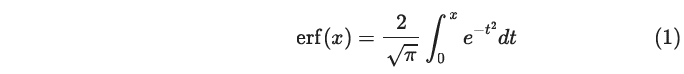

There is not an analytic solution to this integral. However, it has a Taylor series expansion 

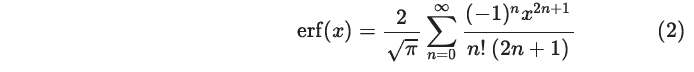

which can further be decomposed into 

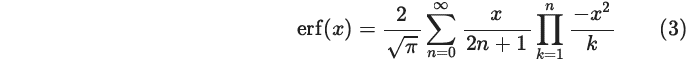

(a) Use Python to program the third equation for $\mathrm{erf}(x)$ using nested loops: an _inner loop_ for the product over $k$ and an _outer loop_ for the sum over $n$. Prove that your error function gets the correct value for $x=1.2$ for at least 6 digits (see code below). Because you cannot do an infinite number of terms in your Taylor series, you must choose an upper value for _n_ called `n_max`. Make `n_max = 100`. Your code should be well-documented.

(b) Modify your code to improve its speed by causing the _inner loop_ to terminate early (i.e. before `n` reaches `n_max` while leaving `n_max` unchanged) by checking to see if the error in the value of $\mathrm{erf}(x)$ is less than $\epsilon=10^{-6}$. As demonstrated in the lecture notes for a different example, this is done by looking at the magnitude of each term in the Taylor series to see if it is smaller than $\epsilon$. Once a term that is too small has been identified, then no further terms are included in the sum.

In [1]:
import math  # you will need to install the Python 'math' package using conda if this line causes an error
from numpy import pi, sqrt
x = 1.2

print("The error function evaluated at x =",x,"is",math.erf(x))

# add your custom function below to evaluat erf(x) by Taylor series and compare to the above result

def my_erf(X):
    """
    my_erf(X): Calculate the gaussian error of a variable X.
    """
    result = 0;                                 # create a clean variable for the sum
    constant = 2/sqrt(pi)                       # calculate the external variables and constants seperately
    n_max = 100                                 # set the number of iterations to approximate infinity
    marg_err = 10**-6                           # margine of error beneath which we can exit the sum prematurely
    for n in range(n_max+1):                    # run through the sum iterations
        partial_sum = X/(2*n+1)                 # calculate the variables and constants outside the product seperately, creating a variable for the products
        for k in range(1,n+1):                  # run through the product iterations, making sure to start at k = 1, and to include n within the loop
            partial_sum *= -1 * X**2 / (k)      # calculate and apply product at this iteration
        result += partial_sum                   # apply sum at this iteration
        if abs(partial_sum) < marg_err: break   # exit sum loop early if the magnitude of error is smaller than the margin of error
    result *= constant                          # apply external variables and constants
    return result                               # return value

print(my_erf(1.2))

The error function evaluated at x = 1.2 is 0.9103139782296353
0.9103140515033431


### Problem 2 (2 points) 
Use Latex within Markdown to reproduce precisely one of the above 3 equations for $\mathrm{erf}(x)$

$$
\text{erf}(x) = \frac{2}{\sqrt\pi} \sum_{n = 0}^{\infty} \frac{x}{2n+1} \prod_{k = 1}^{n} \frac{-x^2}{k}
$$

$ \alpha^2 $


**Note**: Before submitting your homework, do the following 
1. Make sure file name has been changed to your actual name
2. Run --> Restart Kernel
3. Covert the ipynb file to html (file --> export --> html). Then open the html file in your browser and print to pdf.